# Implementing Random Forest Regression Model on Boston House Price Prediction

In [86]:
#Impoting required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [87]:
# Importing the Boston Housing dataset
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

In [88]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [89]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [91]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [92]:
#Check the shape of dataframe
data.shape

(506, 14)

In [93]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [94]:
# Check for duplicated values
data.duplicated().sum()

0

In [95]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

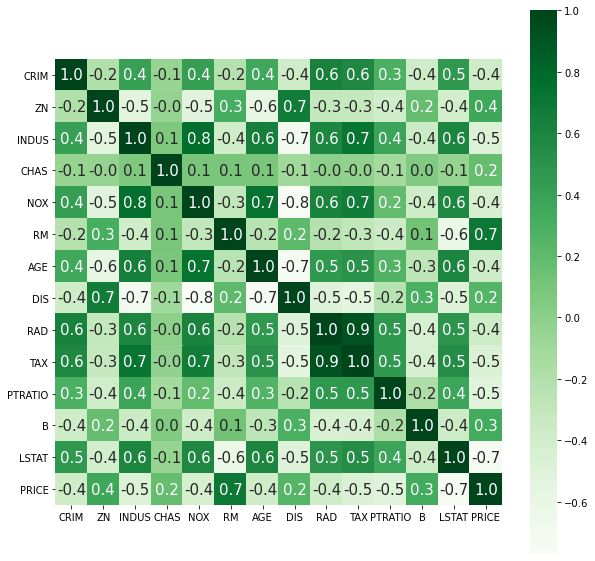

In [96]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [97]:
# Separate features (X) and target (y)
X = data.drop(columns=['PRICE'])  # Assuming 'PRICE' is the target variable
y = data['PRICE']

In [98]:
# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [100]:
# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [101]:
# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

Mean Absolute Error (MAE): 2.013292128376533
Mean Squared Error (MSE): 7.758826923854139
Root Mean Squared Error (RMSE): 2.785467092581447
R-squared Score (R²): 0.8941984636618061


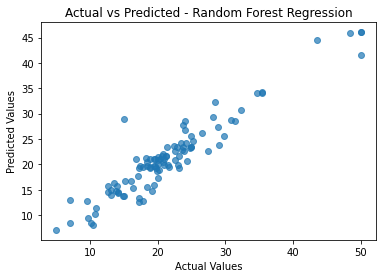

In [102]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest Regression")
plt.show()

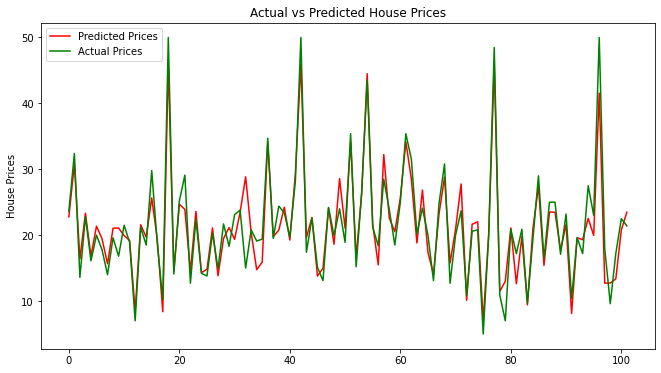

In [103]:
#Draw Predicted v/s Actual house price plot(scatter plot)
ind=[i for i in range(len(y_test))]
plt.figure(figsize=(11,6))
plt.plot(ind, y_pred, color='red', label="Predicted Prices")
plt.plot(ind,y_test, color='green',label='Actual Prices')
plt.ylabel("House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()